In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os
import numpy as np

In [2]:
file_path = "../input"
files = os.listdir(file_path)
dataset = pd.read_csv(os.path.join(file_path, "train.csv"))

train_x = dataset.drop("label", axis=1)

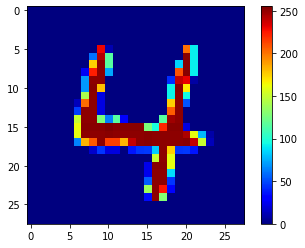

In [3]:
test_row = train_x.iloc[42]
test_digit = test_row.values.reshape(28,28)
img = test_digit

image = img.reshape(28, 28, 1)
shape = image.shape

plt.imshow(img, cmap="jet")
plt.colorbar()

In [4]:
kernel_shape = (3, 3)
stride = (1, 1)
filters = 1
p = 0

bias = np.random.randn(filters, 1)
weights = np.random.randn(3, 3, 1, filters)


input_shape = img.shape
output_shape = (int((input_shape[0] - kernel_shape[0] + 2 * p) / stride[0]) + 1, 
                    int((input_shape[1] - kernel_shape[1] + 2 * p) / stride[1]) + 1, filters)

out = np.zeros(output_shape)

out.shape

(26, 26, 1)

In [5]:
for f in range(filters):
    zeros_h = np.zeros((shape[1], shape[2])).reshape(-1, shape[1], shape[2])
    zeros_v = np.zeros((shape[0]+2, shape[2])).reshape(shape[0]+2, -1, shape[2])
    padded_img = np.vstack((zeros_h, image, zeros_h)) # add rows
    padded_img = np.hstack((zeros_v, padded_img, zeros_v)) # add cols

    col = 0
    row = 0

    rv = 0
    cimg = []
    for r in range(kernel_shape[0], shape[0]+1, stride[0]):
        cv = 0
        for c in range(kernel_shape[1], shape[1]+1, stride[1]):
            chunk = padded_img[rv:r, cv:c]
            soma = (np.multiply(chunk, weights[:, :, :, f]))
            summa = soma.sum() + np.random.uniform()
            
            col += 1
            cimg.append(summa)
            cv+=stride[1]
        row += 1
        rv+=stride[0]
    cimg = np.array(cimg).reshape(int(rv/stride[0]), int(cv/stride[1]))
    out[:, :, f] = cimg

In [6]:
out.shape

(26, 26, 1)

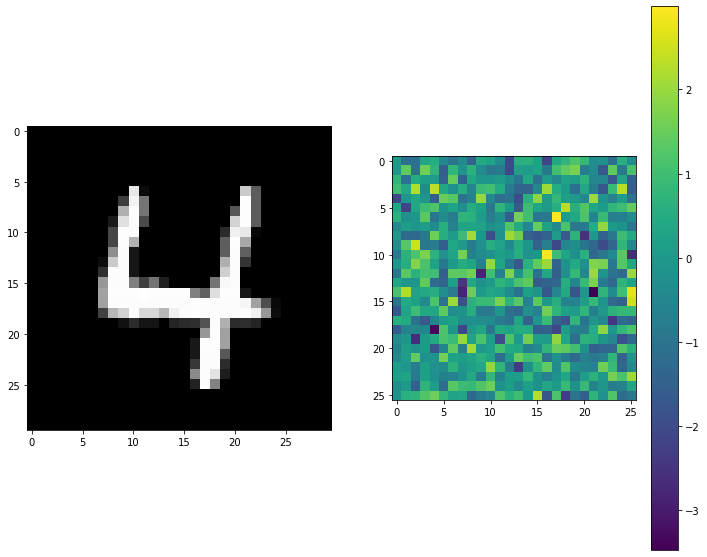

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12,10))
axs = axs.ravel()

splot = axs[1].imshow(np.random.randn(26, 26))
oplot = axs[0].imshow(padded_img.squeeze(axis=2), cmap="gray")


fig.colorbar(splot)

In [14]:
import matplotlib.patches as patches
import cv2

title = axs[0].text(0.5,0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=axs[0].transAxes, ha="center")

init = out.squeeze(axis=2)

ttt = np.zeros_like(init).ravel()
sss = init.ravel()

t = [0]


def update(col):

    aaa = 0
    
    copy_img = padded_img.squeeze(axis=2).copy()


    small_t = [0]
    small_t.append(col)
    if (col+1)%26 == 0 and col != 0:
        t.append(small_t)  

    pt1 = ((col)%26-1, len(t)-2)
    pt2 = ((col)%26+2, len(t)+1)

    rec_img = cv2.rectangle(copy_img, pt1, pt2, (255,255,255), 1)
    oplot.set_data(rec_img)

    rec_img = padded_img.squeeze(axis=2)
    
    title.set_text(f"col: {col}")
    
    # axs[0].imshow(padded_img.squeeze(axis=2))

    # rect = patches.Rectangle((col%26, len(t)), 3, 3,edgecolor="r", linewidth=3, facecolor="none")
    # axs[0].add_patch(rect)
    fig.colorbar(oplot)
    ttt[:col] = sss[:col]    
    splot.set_data(ttt.reshape((26,26)))    
    
    
    return splot , oplot, title

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation
import numpy as np

ani = matplotlib.animation.FuncAnimation(fig, update, frames=out.shape[0]*out.shape[1])
ani


ValueError: left cannot be >= right

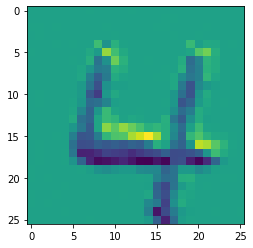

In [10]:
plt.imshow(out.squeeze(axis=2))

In [11]:
plt.show()